In this file it is gonna be implemented a basic neural network to accomplish the task of MNIST hand written data classification

In [1]:
import urllib.request
import gzip
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
def load_mnist():
    base_url = 'http://yann.lecun.com/exdb/mnist/'
    files = ['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz',
             't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']
    paths = []
    for file in files:
        paths.append(urllib.request.urlretrieve(base_url + file, file)[0])
    with gzip.open(paths[0], 'rb') as f:
        X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)
    with gzip.open(paths[1], 'rb') as f:
        y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    with gzip.open(paths[2], 'rb') as f:
        X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)
    with gzip.open(paths[3], 'rb') as f:
        y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    return X_train, y_train, X_test, y_test

In [3]:
x_train, y_train, x_test, y_test = load_mnist()
traindata =[x_train, y_train]
testdata = [x_test, y_test]

C:\Users\Esteban\AppData\Local\Temp\ipykernel_12260\3055726039.py:1: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_numpy.cpp:212.)
  x_train = torch.Tensor(x_train)


tensor(5.)


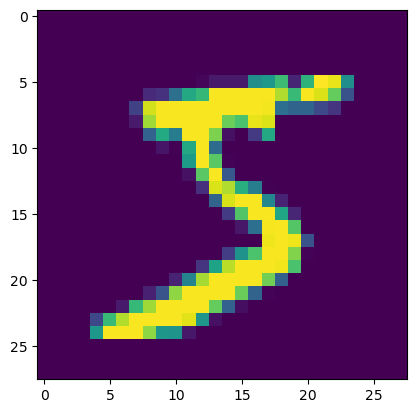

In [4]:
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)

plt.imshow(x_train[0].view(28,-1))
print(y_train[0])

Once we have obtained the raw images, we can apply the transformations that we may find relevant as a way to augmentate the data. We need to modify the available data following what we would like the network to learn, replicating the desired changes

In [5]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset

In [44]:
###################
# HYPERPARAMETERS:#
###################
BATCH_SIZE=32
EPOCHS = 2
LR = 0.001

In [6]:
Transform = transforms.Compose([
    transforms.ToTensor()
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ])


In [7]:
class Dataset(Dataset):
    def __init__(self, data, transform=None):
        self.data = data    
        if transform != None:
            self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        img = self.data[0][index].reshape(28,-1)
        label = self.data[1][index]
        if self.transform:
            img = self.transform(img).view(28,-1)
        return img, label

In [8]:
train_set = Dataset(traindata,Transform)

In [37]:
train_set = torchvision.datasets.MNIST('./data', train=True, download=True, transform=Transform)

In [38]:
#train_set = Dataset(traindata,Transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

In [11]:
for images, labels in dataloader:
    print("True")
    break

True


In [50]:
class Classifier(torch.nn.Module):
    
    def __init__(self,config):
        super(Classifier,self).__init__()
        self.layer1 = torch.nn.Linear(config.input_size, config.layer1_size)
        self.layer2 = torch.nn.Linear(config.layer1_size, config.layer2_size)
        self.layer3 = torch.nn.Linear(config.layer2_size, config.output_size)

    def forward(self, x):
        x = torch.nn.functional.relu(self.layer1(x))
        x = torch.nn.functional.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [51]:
class Config:
    def __init__(self, input_size, layer1_size, layer2_size, output_size):
        self.input_size = input_size
        self.layer1_size = layer1_size
        self.layer2_size = layer2_size
        self.output_size = output_size

In [53]:
config = Config(input_size=784, layer1_size=128, layer2_size=64, output_size=10)
model = Classifier(config)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 0.001)

In [55]:
global_loss = []
accuracy = []
EPOCHS = 2

for i in range(EPOCHS):
    epoch_loss = []
    epoch_accuracy = []
    print(f"Epoch {i+1} of {EPOCHS}")
    for j, batch in enumerate(trainloader):
        print(f"Batch {j+1} of {len(trainloader)}")

        #Unpack the data
        images = batch[0].view(BATCH_SIZE,-1)
        labels = batch[1]

        #Feed the data
        outputs = model(images)
        optimizer.zero_grad()
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        #Store statistical data
        epoch_loss.append(loss.item())
        batch_accuracy = (torch.argmax(outputs, dim=1) == labels).float().mean().item()
        epoch_accuracy.append(batch_accuracy)

    # Compute and store epoch statistics
    global_loss.append(sum(epoch_loss) / len(epoch_loss))
    accuracy.append(sum(epoch_accuracy) / len(epoch_accuracy))


Epoch 0 of 2
Batch 0 of 1875
Batch 1 of 1875
Batch 2 of 1875
Batch 3 of 1875
Batch 4 of 1875
Batch 5 of 1875
Batch 6 of 1875
Batch 7 of 1875
Batch 8 of 1875
Batch 9 of 1875
Batch 10 of 1875
Batch 11 of 1875
Batch 12 of 1875
Batch 13 of 1875
Batch 14 of 1875
Batch 15 of 1875
Batch 16 of 1875
Batch 17 of 1875
Batch 18 of 1875
Batch 19 of 1875
Batch 20 of 1875
Batch 21 of 1875
Batch 22 of 1875
Batch 23 of 1875
Batch 24 of 1875
Batch 25 of 1875
Batch 26 of 1875
Batch 27 of 1875
Batch 28 of 1875
Batch 29 of 1875
Batch 30 of 1875
Batch 31 of 1875
Batch 32 of 1875
Batch 33 of 1875
Batch 34 of 1875
Batch 35 of 1875
Batch 36 of 1875
Batch 37 of 1875
Batch 38 of 1875
Batch 39 of 1875
Batch 40 of 1875
Batch 41 of 1875
Batch 42 of 1875
Batch 43 of 1875
Batch 44 of 1875
Batch 45 of 1875
Batch 46 of 1875
Batch 47 of 1875
Batch 48 of 1875
Batch 49 of 1875
Batch 50 of 1875
Batch 51 of 1875
Batch 52 of 1875
Batch 53 of 1875
Batch 54 of 1875
Batch 55 of 1875
Batch 56 of 1875
Batch 57 of 1875
Batch 58 of